# Project: SMS Spam Classification Model-



**PROBLEM STATEMENT**

# Design a Machine Learning model which can classify whether a given message is spam or not.
➔ You can use appropriate EDA technique as per your understanding.

➔ Draw some visualization which states some sort of insight from the given dataset


➔ Use different - different models to check which is giving best accuracy in terms of classifying whether a given SMS is spam or not.


**IMPORT LIBRARIES**

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**READING DATA**

In [ ]:
spam_data = pd.read_csv ('/content/spam.csv',encoding='latin-1')

In [ ]:
spam_data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


# **DATA PRE-PROCESSING**



In [ ]:
# checking the datatype of columns -
spam_data.dtypes

v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object

**Let us remove the NaN conatining columns and rename our feature and label**

In [ ]:
# taking feature and label from the spam_data
s_df = spam_data.iloc[:,0:2]

s_df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#renaming our columns
s_df = s_df.rename(columns={"v2" : "input_text", "v1":"output_label"})
s_df

,output_label,input_text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


**Let us count the values in output_label**

In [ ]:
s_df['output_label'].value_counts()

ham     4825
spam     747
Name: output_label, dtype: int64

In [ ]:
# checking if there is any missing values in the final data-
s_df.isnull().any()

output_label    False
input_text      False
dtype: bool

In [ ]:
# Here we have no missing values so our data is clean Now-

# **VISUALIZING OUR DATA**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fadda461820>,
      dtype=object)

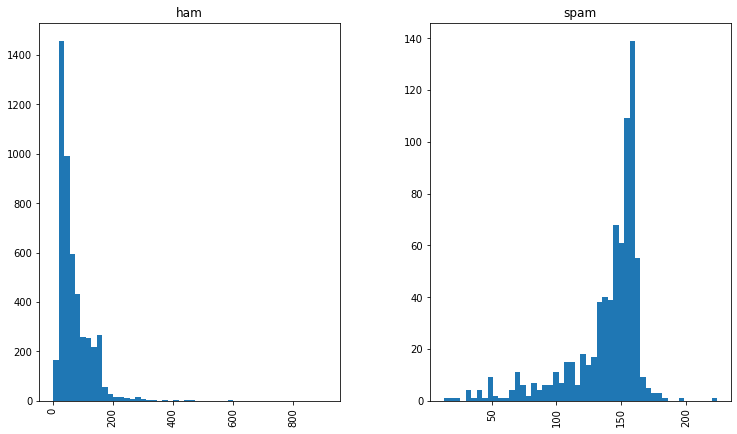

In [ ]:
s_df['text_length'] = s_df['input_text'].map(lambda x: len(x))

s_df.hist(column='text_length', by='output_label', bins=50, figsize=(12,7))

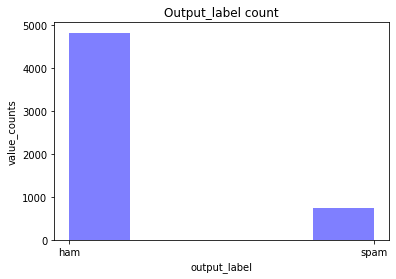

In [ ]:
ax = plt.gca()
ax.hist(s_df['output_label'], color='blue',alpha=0.5, bins=5)

#Adding the aesthetics
plt.title('Output_label count')
plt.xlabel('output_label')
plt.ylabel('value_counts') 

#Show the plot
plt.show()

# Some of the Important Insights that I got from the analysis done Through this Project are:

* **In the data set count of spam is less than count of ham**
*  **The length of input strings are mostly centered to 150 in case of SPAM and in case of HAM length of text is more centered towards 1 - 50**



In [ ]:
# encoding the output label-

y = s_df['output_label'].map({'ham':1 ,'spam':0})


In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
# storing input_column to text variable
text = list(s_df['input_text'])

# Converting our text data to numeric data using TfidVectorizer library-

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# TD-IDF Matrix
vectors = vectorizer.fit_transform(text)

# extracting feature names
tfidf_tokens = vectorizer.get_feature_names_out()

In [ ]:
X = vectors

In [ ]:
X.shape

(5572, 8672)

# Training and Testing 

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state= 42)


In [ ]:
print (X_train.shape)
print (X_test.shape)
print (y_train.shape)
print (y_test.shape)

(4179, 8672)
(1393, 8672)
(4179,)
(1393,)


**Import the required classes and libraries**

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

**Creating objects of all the given models**

In [ ]:
model1 = SVC(kernel='sigmoid', gamma=1.0)
model2 = KNeighborsClassifier(n_neighbors=49)
model3 = GaussianNB()
model4 = DecisionTreeClassifier(min_samples_split=7, random_state=111)
model5 = LogisticRegression(solver='liblinear', penalty='l1')
model6 = RandomForestClassifier(n_estimators=31, random_state=111)

**USING MODEL1: SVM CLASSIFIER**

In [ ]:
# Fitting SVM to the Training set
model1.fit(X_train, y_train)

SVC(gamma=1.0, kernel='sigmoid')

In [ ]:
# Predicting the Test set results
y_pred = model1.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[ 163,   28],
       [   2, 1200]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.85      0.92       191
           1       0.98      1.00      0.99      1202

    accuracy                           0.98      1393
   macro avg       0.98      0.93      0.95      1393
weighted avg       0.98      0.98      0.98      1393



**USING MODEL2: KNN CLASSIFIER**

In [ ]:
# Fitting K-NN to the Training set

from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
model2.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
# Predicting the Test set results
y_pred = model2.predict(X_test)


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [ ]:
cm

array([[  63,  128],
       [   0, 1202]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.33      0.50       191
           1       0.90      1.00      0.95      1202

    accuracy                           0.91      1393
   macro avg       0.95      0.66      0.72      1393
weighted avg       0.92      0.91      0.89      1393



**USING MODEL4: DECISION TREE CLASSIFIER**

In [ ]:
# Fitting Decision Tree Classification to the Training set
from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
model4.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = model4.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
cm

array([[ 154,   37],
       [  10, 1192]])

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.81      0.87       191
           1       0.97      0.99      0.98      1202

    accuracy                           0.97      1393
   macro avg       0.95      0.90      0.92      1393
weighted avg       0.97      0.97      0.97      1393



**USING MODEL6: RANDOM_FOREST_CLASSIFIER**

In [ ]:
# Fitting Random Forest Classification to the Training set

from sklearn.ensemble import RandomForestClassifier
model6 = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
model6.fit(X_train, y_train)


RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=0)

In [ ]:
# Predicting the Test set results

y_pred = model6.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [ ]:
print(cm)

[[ 158   33]
 [   1 1201]]


In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)

In [ ]:
print(report)

              precision    recall  f1-score   support

           0       0.99      0.83      0.90       191
           1       0.97      1.00      0.99      1202

    accuracy                           0.98      1393
   macro avg       0.98      0.91      0.94      1393
weighted avg       0.98      0.98      0.97      1393



In [ ]:
score = [0.98,0.91,0.97,0.98]
models =['svm','knn','dt','rf']

In [ ]:
m_score = {'models': ['svm', 'knn', 'dt', 'rf'], 'score': [0.98, 0.91, 0.97, 0.98]}

In [ ]:
predictions = pd.DataFrame(m_score)

In [ ]:
predictions

,models,score
0,svm,0.98
1,knn,0.91
2,dt,0.97
3,rf,0.98


<BarContainer object of 4 artists>

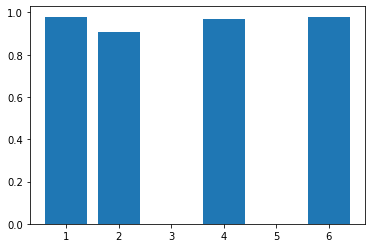

In [ ]:
plt.bar(models, score)

**I HAVE USED THE FOUR DIFFERENT MODELS LIKE [SVM,KNN,DECISION_TREE AND RANDOMFOREST CLASSIFIERS] AND ALL THE MODELS GAVE ME THE nearly ACCURACY OF 98%- SO FINALLY I AM SELECTING RANDOM FOREST AS BEST MODEL DUE TO SOME MORE PROPERTIES OTHER THAN ACCURACY**  

Random forest algorithm avoids and prevents overfitting by using multiple trees. The results are not accurate. This gives accurate and precise results. Decision trees require low computation, thus reducing time to implement and carrying low accura** 

---



**SAVING OUR BEST MODEL**

In [ ]:
import joblib

In [ ]:
joblib.dump(model6,"best_spam_model.pkl")

['best_spam_model.pkl']

**LOADING THE BEST MODEL**

In [ ]:

best_model = joblib.load('best_spam_model.pkl')

# Testing Our Model

In [ ]:
# Taking random text and storing it into a list as text
text = ["Get Free recharge by sharing this link to your friends"]

# converting string data into numeric-
X = vectorizer.transform(text)


In [ ]:
def check(value):
    if value == 0:
        print ("IT IS A SPAM")
    else:
        print ("IT IS  NOT Spam")

In [ ]:
#giving this data to our best model
value = best_model.predict(X)

In [ ]:
# resulting either 0 means spam or 1 means Ham-
check(value)

IT IS A SPAM


In [ ]:
# our model has predicted this text as spam -- 